# Adding Dependences

In [65]:
using DelimitedFiles
using Images
using Plots

# Extract Matrix From Image

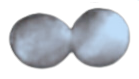

In [66]:
img = load("data/1.png")

## Extracting the grayscale on the image

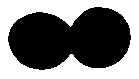

In [81]:
img_channel = Gray.(.!(Gray.(img) .< 0.95))
# img_channel =Gray.(Gray_img)

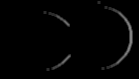

In [68]:
krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
grad_h = imfilter(img_channel, krnl_h')

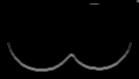

In [69]:
krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
grad_v = imfilter(img_channel, krnl_v')

# Extracting the Contour on the image

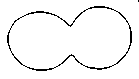

In [70]:
final_img = (grad_h.^2) .+ (grad_v.^2)
final_img = Gray.(.!(Gray.(final_img) .> 0.24))

# Extracting the index of each point

In [71]:
idx = CartesianIndices(size(final_img))[final_img .== 0]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

453×2 Matrix{Int64}:
   8  36
   8  37
   8  38
   8  39
   8  40
   8  41
   8  42
   8  43
   9  33
   9  34
   9  35
   9  36
   9  37
   ⋮  
 132  34
 132  35
 132  36
 132  37
 132  38
 132  39
 132  40
 132  41
 132  42
 132  43
 139   1
 139   2

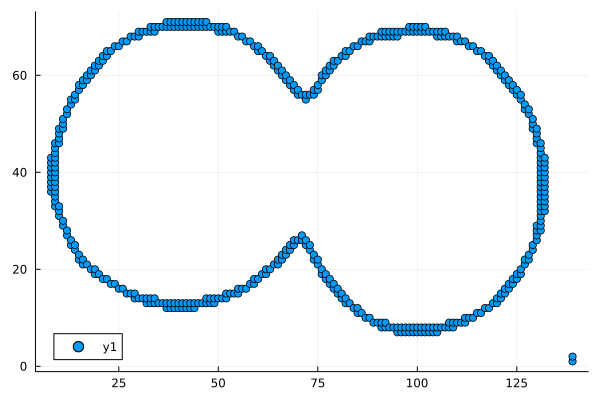

In [72]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

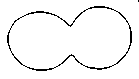

In [73]:
final_img

In [74]:
center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

1×2 Matrix{Float64}:
 72.0706  39.6336

# Putting the index in the center of mass

In [75]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

453×2 Matrix{Float64}:
 -64.0706   -3.63355
 -64.0706   -2.63355
 -64.0706   -1.63355
 -64.0706   -0.633554
 -64.0706    0.366446
 -64.0706    1.36645
 -64.0706    2.36645
 -64.0706    3.36645
 -63.0706   -6.63355
 -63.0706   -5.63355
 -63.0706   -4.63355
 -63.0706   -3.63355
 -63.0706   -2.63355
   ⋮       
  59.9294   -5.63355
  59.9294   -4.63355
  59.9294   -3.63355
  59.9294   -2.63355
  59.9294   -1.63355
  59.9294   -0.633554
  59.9294    0.366446
  59.9294    1.36645
  59.9294    2.36645
  59.9294    3.36645
  66.9294  -38.6336
  66.9294  -37.6336

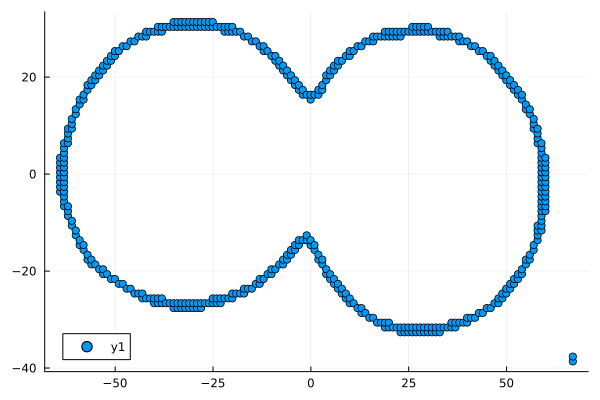

In [76]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [77]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
center_idx_cil_coord = hcat(θ,r)

453×2 Matrix{Float64}:
 273.246   64.1736
 272.354   64.1247
 271.461   64.0915
 270.567   64.0738
  89.6723  64.0717
  88.7782  64.0852
  87.8847  64.1143
  86.9923  64.159
 276.004   63.4185
 275.104   63.3217
 274.202   63.2406
 273.297   63.1752
 272.391   63.1256
   ⋮       
 264.63    60.1936
 265.579   60.1082
 266.53    60.0394
 267.484   59.9872
 268.439   59.9516
 269.394   59.9327
  90.3503  59.9305
  91.3062  59.9449
  92.2613  59.9761
  93.2151  60.0238
 240.005   77.2793
 240.651   76.7843

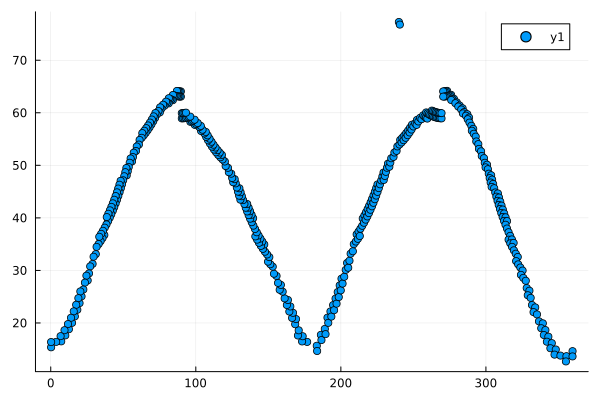

In [78]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)